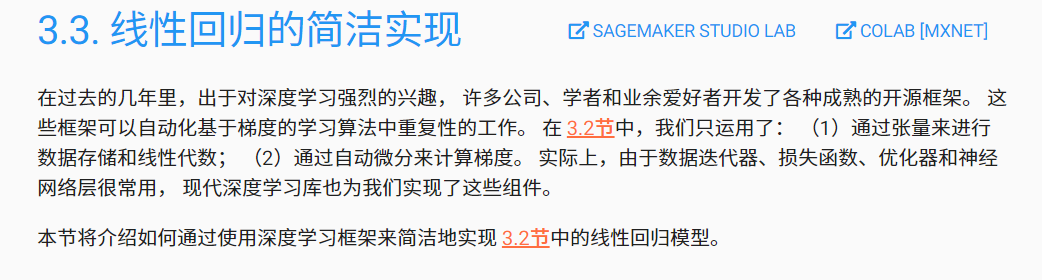

# 1. 生成数据集

与 3.2节中类似，我们首先生成数据集。

In [1]:
import sys

sys.path.append('../../../../')


import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

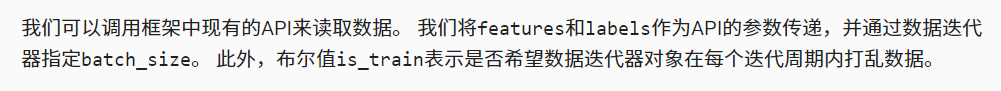

In [2]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

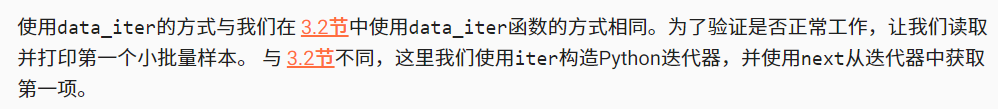

In [3]:
next(iter(data_iter))

[tensor([[-0.3179,  1.3385],
         [-1.1695,  1.3383],
         [ 0.5576, -1.1552],
         [ 0.6589, -0.7407],
         [-1.2005,  0.9671],
         [-2.0275, -2.2853],
         [-0.3487,  0.5785],
         [ 1.2004, -1.3937],
         [ 1.0458, -0.2557],
         [ 0.5186,  1.7073]]),
 tensor([[-0.9892],
         [-2.6968],
         [ 9.2291],
         [ 8.0214],
         [-1.4827],
         [ 7.9176],
         [ 1.5382],
         [11.3639],
         [ 7.1585],
         [-0.5589]])]

# 3. 定义模型

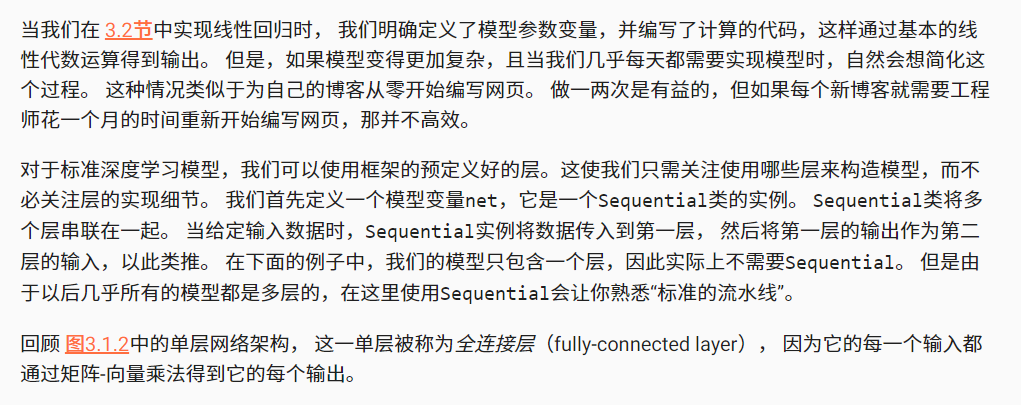

在PyTorch中，全连接层在Linear类中定义。 值得注意的是，我们将两个参数传递到nn.Linear中。 第一个指定输入特征形状，即2，第二个指定输出特征形状，输出特征形状为单个标量，因此为1。

In [4]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

# 4. 初始化模型参数

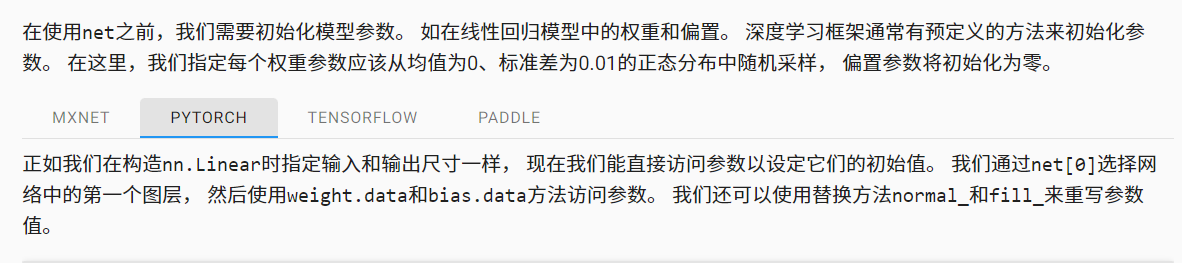

In [5]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

# 5. 定义损失函数

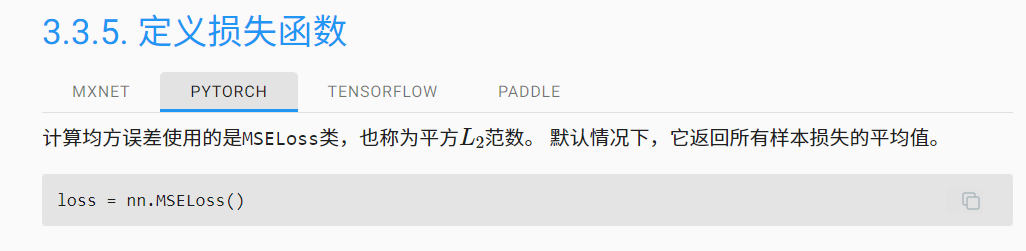

In [6]:
loss = nn.MSELoss()

# 6. 定义优化算法

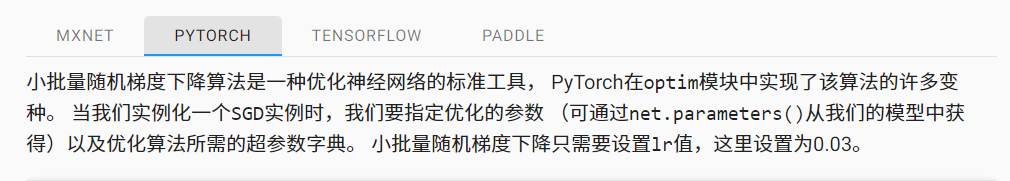

In [7]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

# 7. 训练

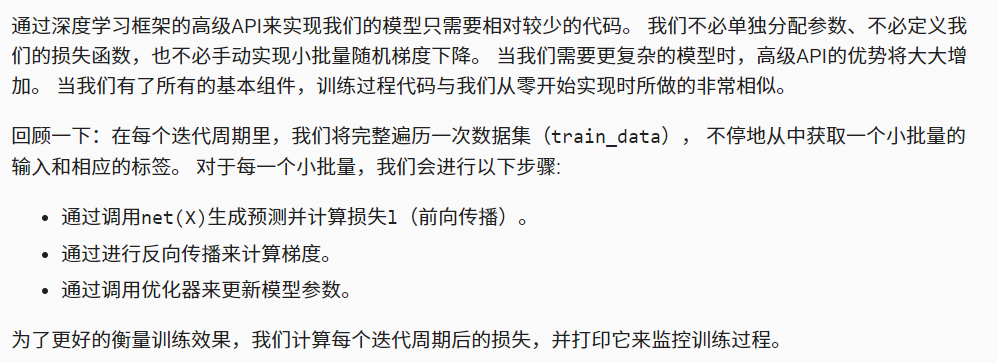

In [8]:
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000219
epoch 2, loss 0.000100
epoch 3, loss 0.000100
epoch 4, loss 0.000101
epoch 5, loss 0.000100
epoch 6, loss 0.000102
epoch 7, loss 0.000100
epoch 8, loss 0.000101
epoch 9, loss 0.000101
epoch 10, loss 0.000100


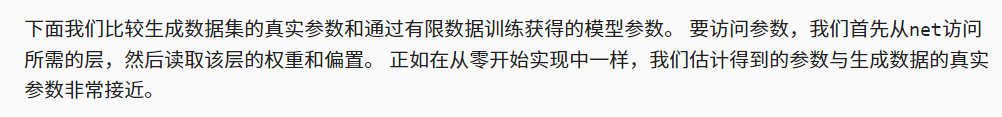

In [9]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 6.8462e-04, -3.5763e-05])
b的估计误差： tensor([0.0005])


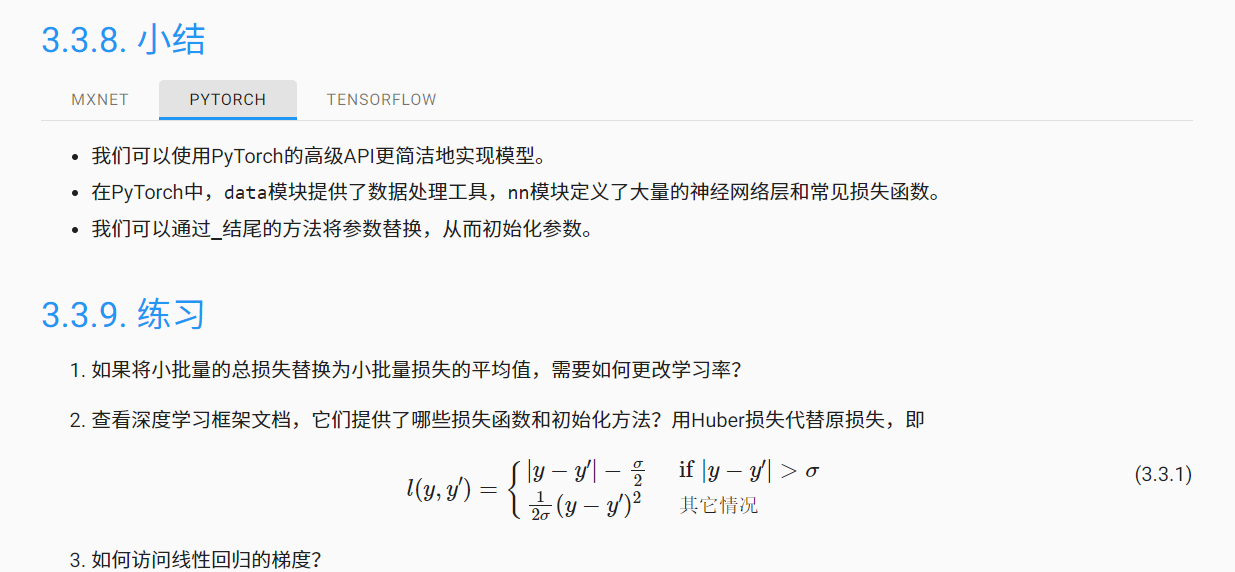